In [2]:
import logging
import pandas as pd
import numpy as np
from numpy import random

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

import re
import nltk
from nltk.corpus import stopwords

import gensim
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../Misc/stack-overflow-data.csv')

In [4]:
df.shape

(40000, 2)

In [5]:
df = df[pd.notnull(df['tags'])]

In [6]:
df.head()

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python


In [7]:
df['post'].apply(lambda x: len(x.split(' '))).sum()

10286120

In [16]:
my_tags = (list(df['tags'].value_counts().index))
print(my_tags)

['.net', 'angularjs', 'asp.net', 'html', 'javascript', 'c#', 'jquery', 'objective-c', 'sql', 'ios', 'c++', 'java', 'python', 'mysql', 'ruby-on-rails', 'css', 'php', 'iphone', 'c', 'android']


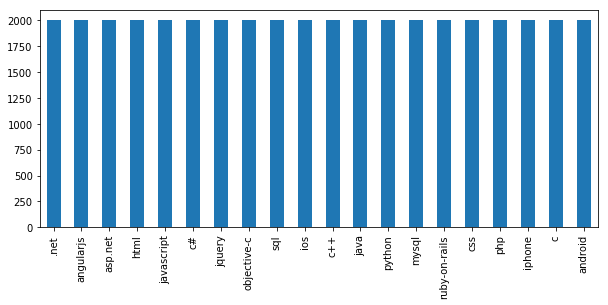

In [19]:
plt.figure(figsize=(10,4))
df.tags.value_counts().plot(kind='bar')

In [33]:
def print_plot(index):
    example = df[df.index == index].values[0]
    if len(example) > 0:
        print(example[0], '\n')
        print('Tag:', example[1])

In [34]:
print_plot(10)

when we need interface c# <blockquote>    <strong>possible duplicate:</strong><br>   <a href= https://stackoverflow.com/questions/240152/why-would-i-want-to-use-interfaces >why would i want to use interfaces </a>   <a href= https://stackoverflow.com/questions/9451868/why-i-need-interface >why i need interface </a>    </blockquote>     i want to know where and when to use it     for example    <pre><code>interface idemo {  // function prototype  public void show(); }  // first class using the interface class myclass1 : idemo {  public void show()  {   // function body comes here   response.write( i m in myclass );  }  }  // second class using the interface class myclass2 : idemo {  public void show()   {   // function body comes here   response.write( i m in myclass2 );   response.write( so  what  );  } </code></pre>   these two classes has the same function name with different body. this can be even achieved without interface. then why we need an interface where and when to use it 

Ta

In [35]:
print_plot(30)

how to chain expressions inside ngclass when using the {...}[] form  how can i add another expression to an <code>ng-class</code> directive that uses this form:   <pre><code>ng-class= {true: loading   false: loading-done }[data.loader===null]  </code></pre>   i d like to add something like this to the list:   <pre><code>{highlight:isspecial} </code></pre>   is it possible without expanding the first expression     thanks. 

Tag: angularjs


In [40]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    
    return text

In [41]:
df['post'] = df['post'].apply(clean_text)

In [42]:
print_plot(10)

need interface c# possible duplicate would want use interfaces need interface want know use example interface idemo function prototype public void show first class using interface class myclass1 idemo public void show function body comes response write myclass second class using interface class myclass2 idemo public void show function body comes response write myclass2 response write two classes function name different body even achieved without interface need interface use 

Tag: c#


In [43]:
df['post'].apply(lambda x: len(x.split(' '))).sum()

3880052

In [44]:
X = df.post
y = df.tags

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### *Imp*

The next steps includes feature engineering. We will convert our text documents to a matrix of token counts (CountVectorizer), then transform a count matrix to a normalized tf-idf representation (tf-idf transformer). After that, we train several classifiers.

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB())
              ])

nb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [55]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy score {}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=my_tags))

accuracy score 0.7399166666666667
               precision    recall  f1-score   support

         .net       0.65      0.64      0.64       613
    angularjs       0.94      0.88      0.91       620
      asp.net       0.85      0.94      0.89       587
         html       0.70      0.81      0.75       586
   javascript       0.75      0.87      0.81       599
           c#       0.70      0.54      0.61       589
       jquery       0.80      0.77      0.79       594
  objective-c       0.67      0.89      0.76       610
          sql       0.60      0.57      0.58       617
          ios       0.59      0.65      0.62       587
          c++       0.72      0.50      0.59       611
         java       0.82      0.78      0.80       594
       python       0.81      0.59      0.68       619
        mysql       0.66      0.82      0.73       574
ruby-on-rails       0.61      0.82      0.70       584
          css       0.69      0.65      0.67       578
          php       0.80      

#### Linear support vector machine

In [58]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(alpha=1e-3, random_state=42, max_iter=5))])

sgd.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...dom_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [59]:
%%time
y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7911666666666667
               precision    recall  f1-score   support

         .net       0.77      0.66      0.71       613
    angularjs       0.87      0.93      0.90       620
      asp.net       0.88      0.98      0.93       587
         html       0.80      0.84      0.82       586
   javascript       0.75      0.89      0.82       599
           c#       0.76      0.41      0.54       589
       jquery       0.86      0.73      0.79       594
  objective-c       0.68      0.95      0.79       610
          sql       0.82      0.50      0.62       617
          ios       0.71      0.60      0.65       587
          c++       0.72      0.64      0.68       611
         java       0.81      0.88      0.84       594
       python       0.78      0.78      0.78       619
        mysql       0.84      0.85      0.85       574
ruby-on-rails       0.82      0.80      0.81       584
          css       0.70      0.68      0.69       578
          php       0.78      0.91  

#### Logistic regression

In [62]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', LogisticRegression(C=1e5, n_jobs=1))])

logreg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

In [63]:
%%time
y_pred = logreg.predict(X_test)

print('accuracy score {}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=my_tags))

accuracy score 0.7769166666666667
               precision    recall  f1-score   support

         .net       0.67      0.62      0.65       613
    angularjs       0.93      0.91      0.92       620
      asp.net       0.96      0.95      0.95       587
         html       0.77      0.77      0.77       586
   javascript       0.77      0.82      0.80       599
           c#       0.60      0.59      0.59       589
       jquery       0.80      0.76      0.78       594
  objective-c       0.79      0.85      0.82       610
          sql       0.67      0.67      0.67       617
          ios       0.61      0.58      0.59       587
          c++       0.63      0.63      0.63       611
         java       0.83      0.82      0.83       594
       python       0.76      0.76      0.76       619
        mysql       0.84      0.84      0.84       574
ruby-on-rails       0.79      0.82      0.81       584
          css       0.62      0.64      0.63       578
          php       0.82      

#### Word2vec embedding and Logistic Regression

In [67]:
from gensim.models import word2vec

wv = gensim.models.KeyedVectors.load_word2vec_format("../Misc/GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

In [68]:
from itertools import islice
list(islice(wv.vocab, 13030, 13050))

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

In [72]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [69]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

In [70]:
train, test = train_test_split(df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda x: w2v_tokenize_text(x['post']), axis=1).values
train_tokenized = train.apply(lambda x: w2v_tokenize_text(x['post']), axis=1).values

In [73]:
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['tags'])
y_pred = logreg.predict(X_test_word_average)

In [75]:
print('accuracy %s' % accuracy_score(y_pred, test.tags))
print(classification_report(test.tags, y_pred,target_names=my_tags))

accuracy 0.6704166666666667
               precision    recall  f1-score   support

         .net       0.65      0.59      0.62       613
    angularjs       0.78      0.81      0.79       620
      asp.net       0.79      0.82      0.80       587
         html       0.69      0.71      0.70       586
   javascript       0.72      0.78      0.75       599
           c#       0.46      0.42      0.44       589
       jquery       0.68      0.65      0.67       594
  objective-c       0.73      0.82      0.77       610
          sql       0.61      0.59      0.60       617
          ios       0.56      0.56      0.56       587
          c++       0.56      0.53      0.55       611
         java       0.66      0.66      0.66       594
       python       0.64      0.65      0.65       619
        mysql       0.60      0.59      0.59       574
ruby-on-rails       0.70      0.71      0.71       584
          css       0.50      0.49      0.49       578
          php       0.72      0.74  

#### Doc2vec and Logistic Regression

In [79]:
from tqdm import tqdm
tqdm.pandas(desc='progress-bar')
from gensim.models import Doc2Vec

from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument

In [81]:
def label_sentences(corpus, label_type):
    
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    
    return labeled

In [82]:
X_train, X_test, y_train, y_test = train_test_split(df.post, df.tags, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [83]:
all_data[2]

TaggedDocument(words=['r', 'cannot', 'resolved', 'variable', 'importing', 'project', 'pasting', 'problems', 'details', 'r', 'cannot', 'resolved', 'variable', 'common', 'problem', 'checked', 'res', 'folder', 'done', 'refreshing', 'project', 'cleaning', 'project', 'validate', 'still', 'error', 'resolved', 'help', 'guys', '2012', '12', '14', '02', '12', '38', 'com', 'example', 'android', 'livecubes', 'cube2', 'cubewallpaper2settings', 'res', 'drawable', 'ic_launcher_wallpaper', 'png', '0', 'error', 'resource', 'entry', 'ic_launcher_wallpaper', 'already', 'defined', '2012', '12', '14', '02', '12', '38', 'com', 'example', 'android', 'livecubes', 'cube2', 'cubewallpaper2settings', 'res', 'drawable', 'ic_launcher_wallpaper', 'html', '0', 'originally', 'defined', '2012', '12', '14', '02', '12', '38', 'com', 'example', 'android', 'livecubes', 'cube2', 'cubewallpaper2settings', 'res', 'xml', 'cube1', 'xml', '0', 'error', 'resource', 'entry', 'cube1', 'already', 'defined', '2012', '12', '14', '02

In [85]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 40000/40000 [00:00<00:00, 1111508.21it/s]


In [86]:
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 40000/40000 [00:00<00:00, 1249392.40it/s]


In [87]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [88]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [89]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [90]:
# logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)

In [91]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.8105
               precision    recall  f1-score   support

         .net       0.71      0.68      0.69       589
    angularjs       0.91      0.92      0.91       661
      asp.net       0.92      0.93      0.92       606
         html       0.80      0.82      0.81       613
   javascript       0.86      0.89      0.88       601
           c#       0.72      0.72      0.72       585
       jquery       0.87      0.85      0.86       621
  objective-c       0.79      0.83      0.81       587
          sql       0.68      0.65      0.67       560
          ios       0.69      0.65      0.67       611
          c++       0.66      0.67      0.67       593
         java       0.83      0.86      0.84       581
       python       0.80      0.76      0.78       608
        mysql       0.85      0.86      0.85       593
ruby-on-rails       0.84      0.83      0.83       592
          css       0.72      0.68      0.70       597
          php       0.86      0.86      0.86    

#### BOW with keras

In [92]:
import itertools
import os

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing import text, sequence
from keras import utils

In [93]:
train_size = int(len(df) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 28000
Test size: 12000


In [94]:
train_posts = df['post'][:train_size]
train_tags = df['tags'][:train_size]

test_posts = df['post'][train_size:]
test_tags = df['tags'][train_size:]

In [95]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [96]:
tokenize.fit_on_texts(train_posts)
X_train = tokenize.texts_to_matrix(train_posts)
X_test = tokenize.texts_to_matrix(test_posts)

In [97]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [98]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [100]:
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (28000, 1000)
x_test shape: (12000, 1000)
y_train shape: (28000, 20)
y_test shape: (12000, 20)


In [101]:
batch_size = 32
epochs = 2

In [102]:
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)

Train on 25200 samples, validate on 2800 samples
Epoch 1/2


17152/25200 [===================>..........] - ETA: 30:03 - loss: 2.9963 - acc: 0.03 - ETA: 15:27 - loss: 3.0177 - acc: 0.03 - ETA: 7:54 - loss: 3.0494 - acc: 0.0312 - ETA: 5:22 - loss: 3.0188 - acc: 0.046 - ETA: 4:06 - loss: 3.0084 - acc: 0.062 - ETA: 3:03 - loss: 2.9727 - acc: 0.079 - ETA: 2:27 - loss: 2.9456 - acc: 0.087 - ETA: 2:03 - loss: 2.9300 - acc: 0.104 - ETA: 1:47 - loss: 2.9168 - acc: 0.118 - ETA: 1:38 - loss: 2.9003 - acc: 0.134 - ETA: 1:28 - loss: 2.8745 - acc: 0.156 - ETA: 1:20 - loss: 2.8474 - acc: 0.176 - ETA: 1:14 - loss: 2.8262 - acc: 0.186 - ETA: 1:08 - loss: 2.7934 - acc: 0.211 - ETA: 1:06 - loss: 2.7843 - acc: 0.216 - ETA: 1:03 - loss: 2.7643 - acc: 0.229 - ETA: 59s - loss: 2.7336 - acc: 0.248 - ETA: 57s - loss: 2.7145 - acc: 0.26 - ETA: 54s - loss: 2.6952 - acc: 0.26 - ETA: 52s - loss: 2.6656 - acc: 0.28 - ETA: 50s - loss: 2.6350 - acc: 0.29 - ETA: 48s - loss: 2.6085 - acc: 0.31 - ETA: 46s - loss: 2.5804 - acc: 0.32 - ETA: 44s - loss: 2.5528 - acc: 0.33 - ETA: 43

25200/25200 [==============================] - ETA: 7s - loss: 1.1168 - acc: 0.703 - ETA: 7s - loss: 1.1142 - acc: 0.704 - ETA: 6s - loss: 1.1120 - acc: 0.704 - ETA: 6s - loss: 1.1092 - acc: 0.705 - ETA: 6s - loss: 1.1068 - acc: 0.706 - ETA: 6s - loss: 1.1033 - acc: 0.706 - ETA: 6s - loss: 1.1015 - acc: 0.706 - ETA: 6s - loss: 1.0995 - acc: 0.707 - ETA: 6s - loss: 1.0983 - acc: 0.707 - ETA: 6s - loss: 1.0972 - acc: 0.707 - ETA: 6s - loss: 1.0963 - acc: 0.707 - ETA: 6s - loss: 1.0939 - acc: 0.708 - ETA: 6s - loss: 1.0923 - acc: 0.708 - ETA: 6s - loss: 1.0910 - acc: 0.709 - ETA: 6s - loss: 1.0886 - acc: 0.709 - ETA: 6s - loss: 1.0882 - acc: 0.709 - ETA: 5s - loss: 1.0872 - acc: 0.709 - ETA: 5s - loss: 1.0857 - acc: 0.710 - ETA: 5s - loss: 1.0843 - acc: 0.710 - ETA: 5s - loss: 1.0837 - acc: 0.710 - ETA: 5s - loss: 1.0823 - acc: 0.710 - ETA: 5s - loss: 1.0811 - acc: 0.710 - ETA: 5s - loss: 1.0802 - acc: 0.710 - ETA: 5s - loss: 1.0790 - acc: 0.711 - ETA: 5s - loss: 1.0781 - acc: 0.711 - ETA

16448/25200 [==================>...........] - ETA: 18s - loss: 0.5404 - acc: 0.81 - ETA: 18s - loss: 0.5129 - acc: 0.84 - ETA: 18s - loss: 0.5925 - acc: 0.80 - ETA: 19s - loss: 0.5371 - acc: 0.82 - ETA: 20s - loss: 0.5471 - acc: 0.80 - ETA: 20s - loss: 0.5515 - acc: 0.80 - ETA: 20s - loss: 0.5495 - acc: 0.81 - ETA: 20s - loss: 0.5501 - acc: 0.81 - ETA: 20s - loss: 0.5418 - acc: 0.81 - ETA: 19s - loss: 0.5385 - acc: 0.81 - ETA: 19s - loss: 0.5188 - acc: 0.82 - ETA: 19s - loss: 0.5158 - acc: 0.83 - ETA: 19s - loss: 0.5054 - acc: 0.83 - ETA: 18s - loss: 0.5021 - acc: 0.83 - ETA: 19s - loss: 0.5036 - acc: 0.83 - ETA: 19s - loss: 0.5045 - acc: 0.83 - ETA: 19s - loss: 0.5100 - acc: 0.83 - ETA: 19s - loss: 0.5177 - acc: 0.83 - ETA: 20s - loss: 0.5314 - acc: 0.82 - ETA: 20s - loss: 0.5314 - acc: 0.82 - ETA: 20s - loss: 0.5381 - acc: 0.82 - ETA: 19s - loss: 0.5384 - acc: 0.82 - ETA: 19s - loss: 0.5324 - acc: 0.82 - ETA: 19s - loss: 0.5305 - acc: 0.82 - ETA: 19s - loss: 0.5212 - acc: 0.83 - ETA

25200/25200 [==============================] - ETA: 6s - loss: 0.5332 - acc: 0.830 - ETA: 6s - loss: 0.5330 - acc: 0.829 - ETA: 6s - loss: 0.5325 - acc: 0.830 - ETA: 6s - loss: 0.5322 - acc: 0.830 - ETA: 6s - loss: 0.5325 - acc: 0.829 - ETA: 6s - loss: 0.5323 - acc: 0.830 - ETA: 6s - loss: 0.5321 - acc: 0.829 - ETA: 6s - loss: 0.5325 - acc: 0.829 - ETA: 6s - loss: 0.5344 - acc: 0.829 - ETA: 6s - loss: 0.5342 - acc: 0.829 - ETA: 6s - loss: 0.5337 - acc: 0.829 - ETA: 6s - loss: 0.5343 - acc: 0.829 - ETA: 6s - loss: 0.5347 - acc: 0.829 - ETA: 6s - loss: 0.5352 - acc: 0.829 - ETA: 6s - loss: 0.5350 - acc: 0.829 - ETA: 5s - loss: 0.5351 - acc: 0.829 - ETA: 5s - loss: 0.5353 - acc: 0.829 - ETA: 5s - loss: 0.5350 - acc: 0.829 - ETA: 5s - loss: 0.5346 - acc: 0.829 - ETA: 5s - loss: 0.5339 - acc: 0.829 - ETA: 5s - loss: 0.5342 - acc: 0.829 - ETA: 5s - loss: 0.5343 - acc: 0.829 - ETA: 5s - loss: 0.5338 - acc: 0.829 - ETA: 5s - loss: 0.5340 - acc: 0.829 - ETA: 5s - loss: 0.5337 - acc: 0.829 - ETA

In [110]:
model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

12000/12000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 180us/step


[0.5974958278735478, 0.8086666666666666]

Multi-Class Text Classification Model Comparison and Selection  
https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568